<a href="https://colab.research.google.com/github/ZanetaP02/DATA602/blob/main/Data_602_Final_Project_Earthquake_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ZanetaP02/DATA602/main/earthquake_dataset.csv'

try:
    df = pd.read_csv(url)
    print(df.head())
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

         Date Time (UTC)                             City  \
0  2025-03-15   16:28:36         55 km NNW of Finschhafen   
1  2025-03-15   03:19:27  5 km ESE of San Miguel Achiutla   
2  2025-03-14   23:42:35    South Sandwich Islands region   
3  2025-03-14   19:37:15              15 km NNE of Lesina   
4  2025-03-14   11:13:32                 229 km N of Palu   

                         Country  Latitude  Longitude  Earthquake Magnitude  \
0               Papua New Guinea   -6.1233   147.5932                   5.1   
1                         Mexico   17.2871   -97.4400                   5.6   
2  South Sandwich Islands region  -55.7385   -27.1122                   6.0   
3                          Italy   41.9788    15.4490                   5.0   
4                      Indonesia    1.1364   120.2317                   5.4   

   Depth (km)  Impact Score  
0      59.033           400  
1      63.551           503  
2      35.379           554  
3       8.742           389  
4      2

In [9]:
# Missing Data Check Before Cleaning
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check if 'Time (UTC)' column exists before accessing it
if 'Time (UTC)' in df.columns:
    # Combine 'Date' and 'Time (UTC)' into a new 'Datetime' column
    # Using errors='coerce' will turn unparseable dates into NaT
    df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time (UTC)'], errors='coerce')

    # Drop the original 'Time (UTC)' column
    df.drop(columns=['Time (UTC)'], inplace=True)

    # Extract Year and Month from the new Datetime column NOW
    # This handles cases where Year column might not exist initially
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.month

    # Filter records from 2015 to 2024
    # Now 'Year' column exists
    # Drop rows where Datetime conversion failed (resulting in NaT) before filtering by year
    df.dropna(subset=['Datetime'], inplace=True)
    df = df[(df['Year'] >= 2015) & (df['Year'] <= 2024)].copy() # Added .copy() to avoid SettingWithCopyWarning

    # Rename columns for clarity
    df.rename(columns={
        'Depth (km)': 'Depth_km',
        'Impact Score': 'Impact_Score'
    }, inplace=True)

    # Remove rows with missing values
    df.dropna(inplace=True)

    # Convert and round numerical columns
    # Check if columns exist before converting
    if 'Magnitude' in df.columns:
        df['Magnitude'] = df['Magnitude'].astype(float).round(2)
    if 'Depth_km' in df.columns:
        df['Depth_km'] = df['Depth_km'].astype(float).round(2)
    if 'Impact Score' in df.columns: # Check for original name before rename
        df['Impact_Score'] = df['Impact Score'].astype(int)
    elif 'Impact_Score' in df.columns: # Check for renamed name
        df['Impact_Score'] = df['Impact_Score'].astype(int)


    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Reset index
    df.reset_index(drop=True, inplace=True)

    # Save cleaned dataset
    df.to_csv('cleaned_earthquake_dataset.csv', index=False)
    print("\nData cleaned and saved successfully.")

    # --- Added Missing Data Check After Cleaning ---
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    # -----------------------------------------------
    print("\nCleaned Data Head:")
    print(df.head())

else:
    print("The 'Time (UTC)' column does not exist in the dataset.")
    print("Available columns:", df.columns.tolist())
    print(df.head())



Missing values before cleaning:
Date                    0
City                    0
Country                 0
Latitude                0
Longitude               0
Earthquake Magnitude    0
Depth_km                0
Impact_Score            0
Datetime                0
Year                    0
Month                   0
dtype: int64
The 'Time (UTC)' column does not exist in the dataset.
Available columns: ['Date', 'City', 'Country', 'Latitude', 'Longitude', 'Earthquake Magnitude', 'Depth_km', 'Impact_Score', 'Datetime', 'Year', 'Month']
        Date                    City           Country  Latitude  Longitude  \
0 2024-12-31       49 km W of Puerto             Chile  -20.1826   -70.6231   
1 2024-12-31  124 km ESE of Kandrian  Papua New Guinea   -6.6675   150.5771   
2 2024-12-31     60 km WNW of Rabaul  Papua New Guinea   -4.0500   151.6351   
3 2024-12-30   13 km NW of Port-Vila           Vanuatu  -17.6555   168.2183   
4 2024-12-30     63 km W of Coquimbo             Chile  -29.9272 

Cleaned dataset loaded successfully.

Required columns for analysis found. Generating plots.


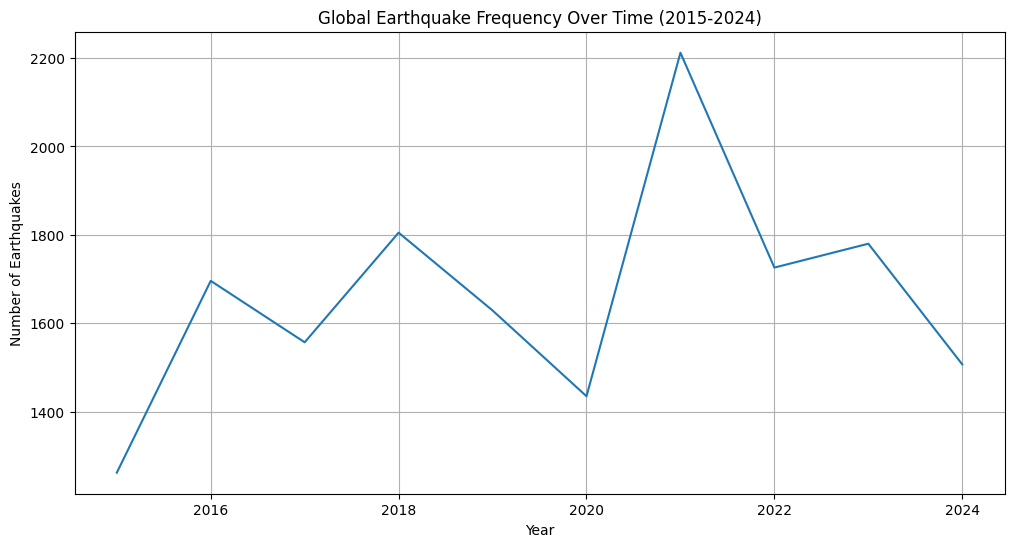

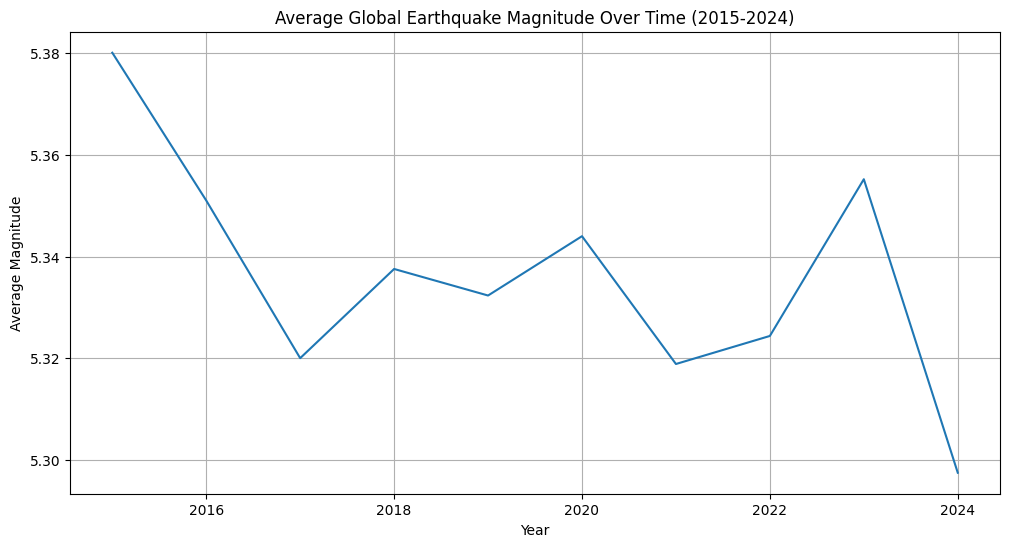

<ipython-input-2-9b56be67b845>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')


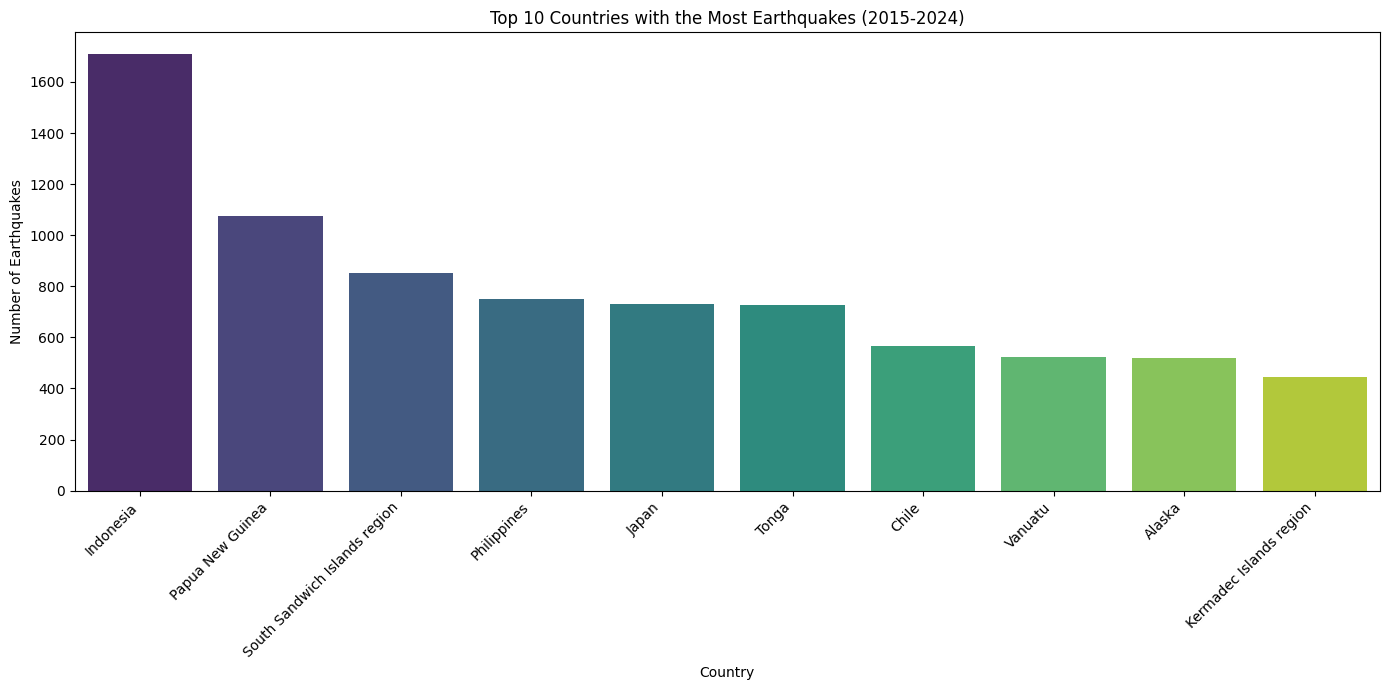

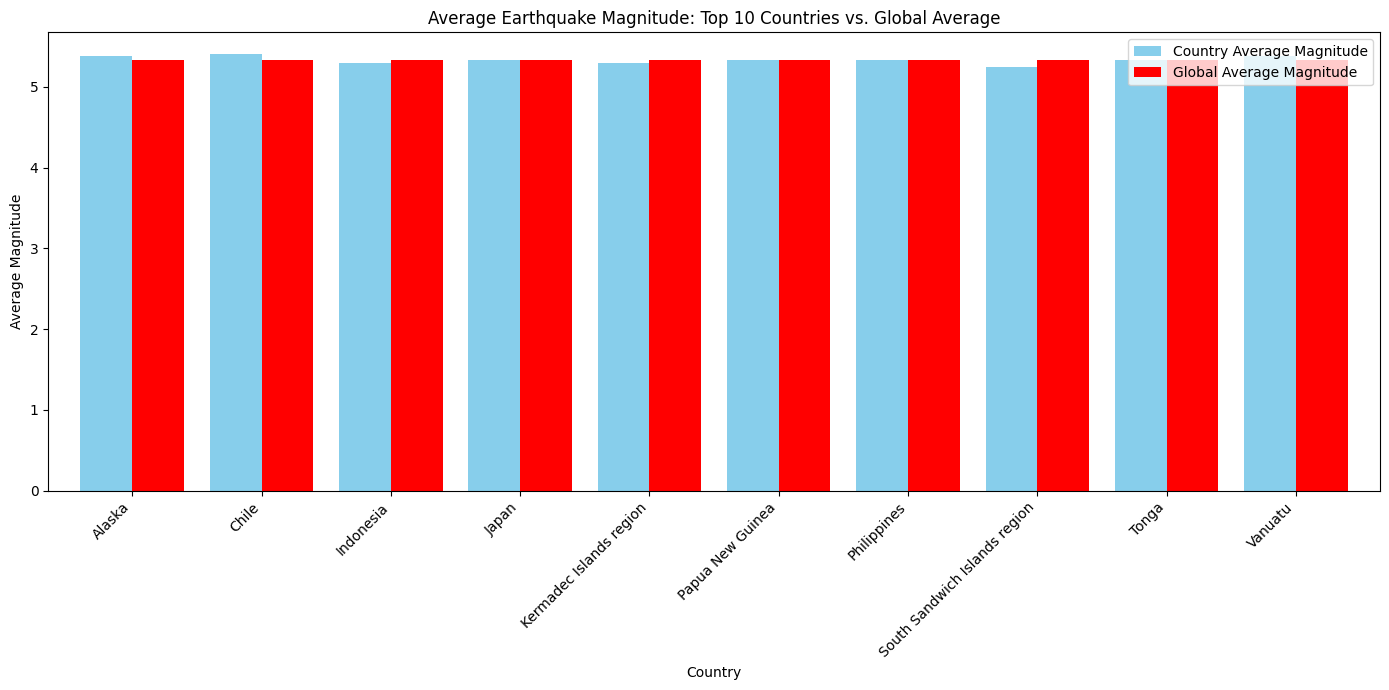

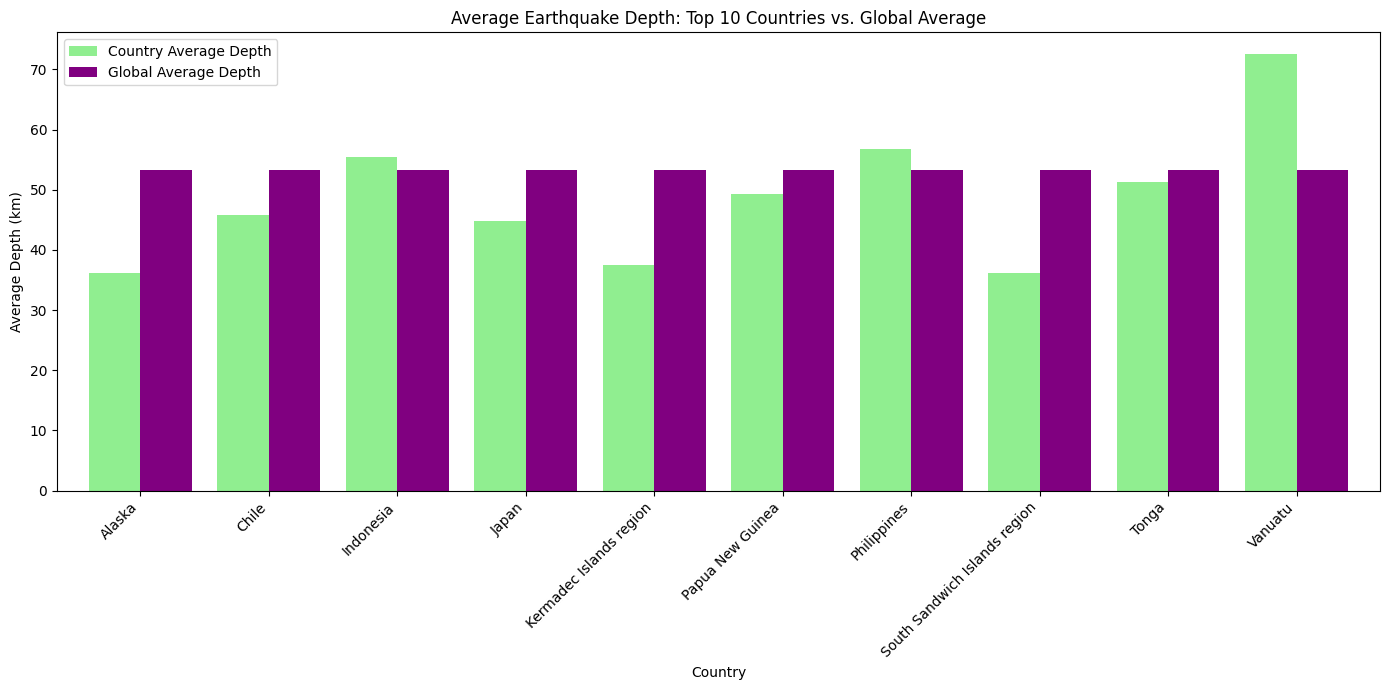

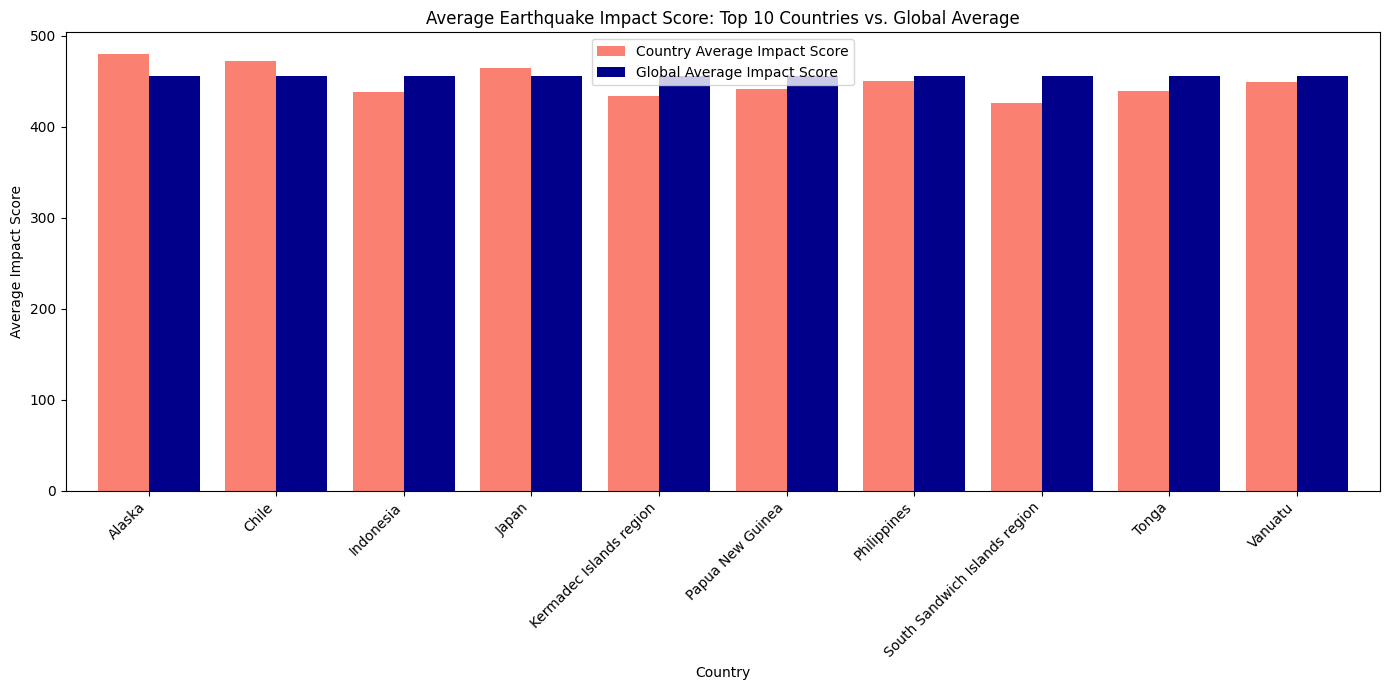

<ipython-input-2-9b56be67b845>:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=earthquakes_per_month.index, y=earthquakes_per_month.values, palette='plasma')


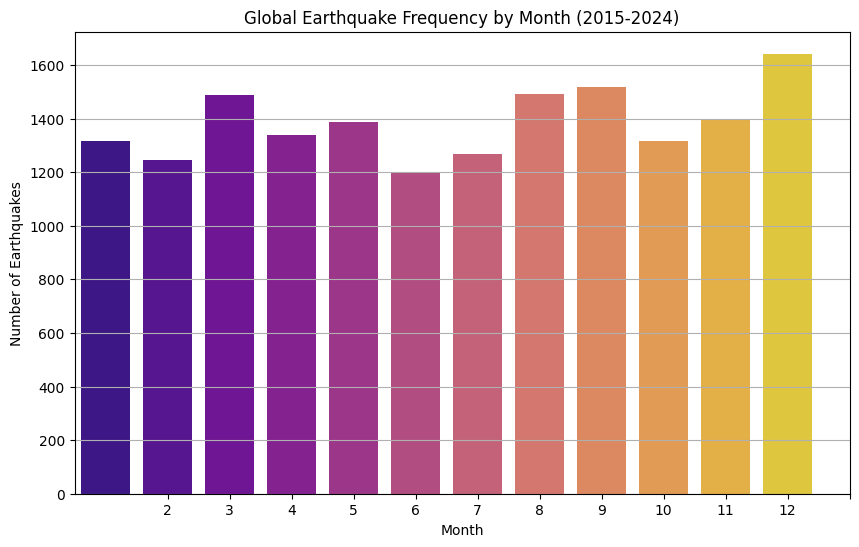

<ipython-input-2-9b56be67b845>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_magnitude_by_month.index, y=average_magnitude_by_month.values, palette='viridis')


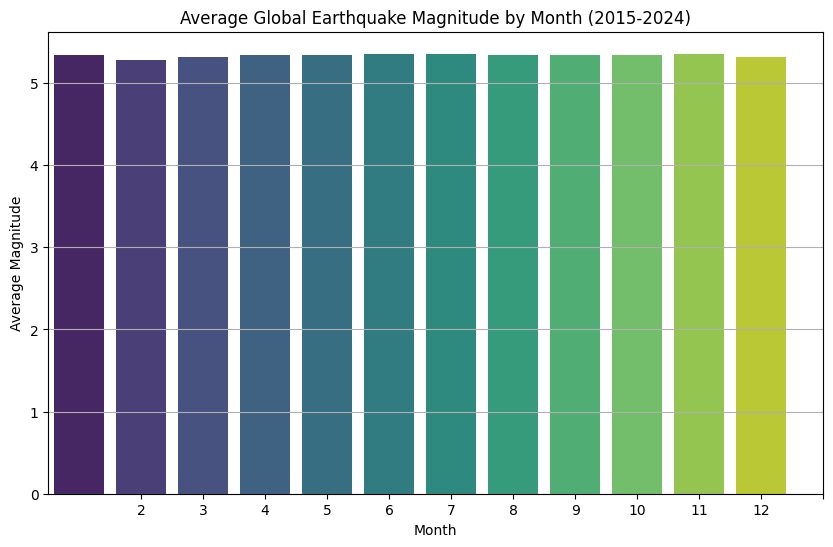

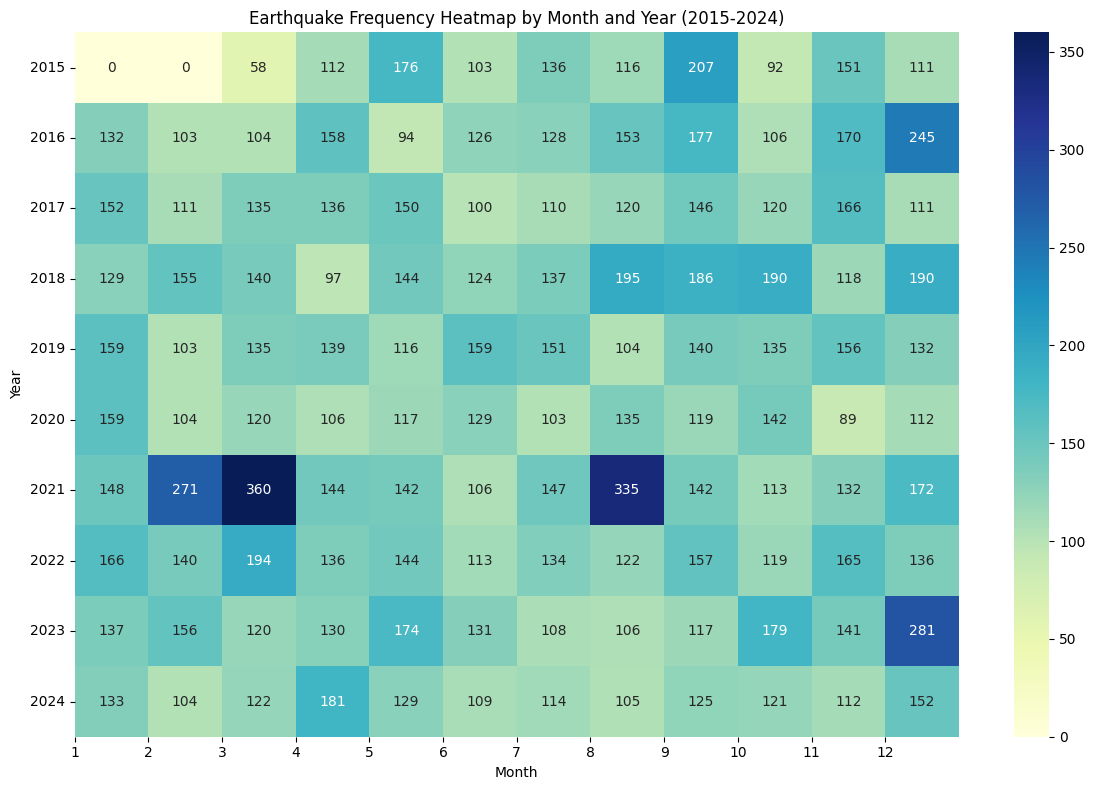

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
url_cleaned = 'https://raw.githubusercontent.com/ZanetaP02/DATA602/refs/heads/main/cleaned_earthquake_dataset.csv'

try:
    df_cleaned = pd.read_csv(url_cleaned)
    print("Cleaned dataset loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the cleaned dataset: {e}")
    df_cleaned = None # Ensure df_cleaned is None if loading fails

# Proceed with analysis only if the dataset was loaded successfully
if df_cleaned is not None:

    # Ensure necessary columns are in the correct format
    # Check if 'Datetime' column exists and convert if necessary
    if 'Datetime' in df_cleaned.columns:
         df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Datetime'], errors='coerce')
         # Drop rows where Datetime could not be parsed after loading
         df_cleaned.dropna(subset=['Datetime'], inplace=True)
    elif 'Date' in df_cleaned.columns:
         # If Datetime is not present, but Date is, convert Date
         df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
         df_cleaned.dropna(subset=['Date'], inplace=True)
         # Recreate Year and Month if they are missing but Date is available
         if 'Year' not in df_cleaned.columns:
             df_cleaned['Year'] = df_cleaned['Date'].dt.year
         if 'Month' not in df_cleaned.columns:
              df_cleaned['Month'] = df_cleaned['Date'].dt.month

    # Check if crucial columns exist before proceeding.
    required_cols = ['Year', 'Month', 'Magnitude', 'Depth_km', 'Impact_Score', 'Country']
    if not all(col in df_cleaned.columns for col in required_cols):
        print("\nError: The cleaned dataset is missing one or more required columns for analysis.")
        print(f"Required columns: {required_cols}")
        print(f"Available columns: {df_cleaned.columns.tolist()}")
    else:
        print("\nRequired columns for analysis found. Generating plots.")

        # 1. Global Earthquake Frequency Over Time
        earthquakes_per_year = df_cleaned['Year'].value_counts().sort_index()
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=earthquakes_per_year.index, y=earthquakes_per_year.values)
        plt.title('Global Earthquake Frequency Over Time (2015-2024)')
        plt.xlabel('Year')
        plt.ylabel('Number of Earthquakes')
        plt.grid(True)
        plt.show()

        # 2. Global Earthquake Magnitude Over Time
        average_magnitude_per_year = df_cleaned.groupby('Year')['Magnitude'].mean()

        plt.figure(figsize=(12, 6))
        sns.lineplot(x=average_magnitude_per_year.index, y=average_magnitude_per_year.values)
        plt.title('Average Global Earthquake Magnitude Over Time (2015-2024)')
        plt.xlabel('Year')
        plt.ylabel('Average Magnitude')
        plt.grid(True)
        plt.show()

        # 3. Top 10 Countries by Earthquake Count

        # Count earthquakes per country
        earthquakes_per_country = df_cleaned['Country'].value_counts()
        top_10_countries = earthquakes_per_country.head(10)

        plt.figure(figsize=(14, 7))
        sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
        plt.title('Top 10 Countries with the Most Earthquakes (2015-2024)')
        plt.xlabel('Country')
        plt.ylabel('Number of Earthquakes')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()

        # 4. Features of Earthquakes in Top 10 Countries vs. Global Average

        # Calculate global averages
        global_avg_magnitude = df_cleaned['Magnitude'].mean()
        global_avg_depth = df_cleaned['Depth_km'].mean()
        global_avg_impact = df_cleaned['Impact_Score'].mean()

        # Analyze features for top 10 countries
        top_10_countries_list = top_10_countries.index.tolist()
        # Filter data for only the top 10 countries
        top_10_countries_data = df_cleaned[df_cleaned['Country'].isin(top_10_countries_list)].copy() # Use .copy() to avoid SettingWithCopyWarning

        # Group by country and calculate mean features
        country_features = top_10_countries_data.groupby('Country')[['Magnitude', 'Depth_km', 'Impact_Score']].mean()

        # Visualize comparison for Magnitude
        plt.figure(figsize=(14, 7))
        # Create a DataFrame for plotting to combine country averages and global average
        plot_data_magnitude = country_features[['Magnitude']].copy()
        plot_data_magnitude['Global Average'] = global_avg_magnitude

        plot_data_magnitude.plot(kind='bar', width=0.8, color=['skyblue', 'red'], ax=plt.gca())
        plt.title('Average Earthquake Magnitude: Top 10 Countries vs. Global Average')
        plt.xlabel('Country')
        plt.ylabel('Average Magnitude')
        plt.xticks(rotation=45, ha='right')
        plt.legend(['Country Average Magnitude', 'Global Average Magnitude'])
        plt.tight_layout()
        plt.show()

        # Visualize comparison for Depth
        plt.figure(figsize=(14, 7))
        plot_data_depth = country_features[['Depth_km']].copy()
        plot_data_depth['Global Average'] = global_avg_depth

        plot_data_depth.plot(kind='bar', width=0.8, color=['lightgreen', 'purple'], ax=plt.gca())
        plt.title('Average Earthquake Depth: Top 10 Countries vs. Global Average')
        plt.xlabel('Country')
        plt.ylabel('Average Depth (km)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(['Country Average Depth', 'Global Average Depth'])
        plt.tight_layout()
        plt.show()

        # Visualize comparison for Impact Score
        plt.figure(figsize=(14, 7))
        plot_data_impact = country_features[['Impact_Score']].copy()
        plot_data_impact['Global Average'] = global_avg_impact

        plot_data_impact.plot(kind='bar', width=0.8, color=['salmon', 'darkblue'], ax=plt.gca())
        plt.title('Average Earthquake Impact Score: Top 10 Countries vs. Global Average')
        plt.xlabel('Country')
        plt.ylabel('Average Impact Score')
        plt.xticks(rotation=45, ha='right')
        plt.legend(['Country Average Impact Score', 'Global Average Impact Score'])
        plt.tight_layout()
        plt.show()

        # 5. Earthquake Frequency by Month
        # Ensure 'Month' is treated correctly, although value_counts handles integers fine
        earthquakes_per_month = df_cleaned['Month'].value_counts().sort_index()

        plt.figure(figsize=(10, 6))
        # Use the month numbers directly on the x-axis
        sns.barplot(x=earthquakes_per_month.index, y=earthquakes_per_month.values, palette='plasma')
        plt.title('Global Earthquake Frequency by Month (2015-2024)')
        plt.xlabel('Month')
        plt.ylabel('Number of Earthquakes')
        # Set xticks to show month numbers 1-12
        plt.xticks(ticks=range(1, 13))
        plt.grid(axis='y')
        plt.show()

    # 6. Average Global Earthquake Magnitude by Month
    # Group by Month and calculate the average Magnitude
    average_magnitude_by_month = df_cleaned.groupby('Month')['Magnitude'].mean()

    plt.figure(figsize=(10, 6))
    # Use the month numbers directly on the x-axis
    sns.barplot(x=average_magnitude_by_month.index, y=average_magnitude_by_month.values, palette='viridis')
    plt.title('Average Global Earthquake Magnitude by Month (2015-2024)')
    plt.xlabel('Month')
    plt.ylabel('Average Magnitude')
    # Set xticks to show month numbers 1-12
    plt.xticks(ticks=range(1, 13))
    plt.grid(axis='y')
    plt.show()

    # 7. Heatmap of Earthquake Frequency by Month and Year
    # Group by Year and Month and count occurrences
    heatmap_data = df_cleaned.groupby(['Year', 'Month']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Earthquake Frequency Heatmap by Month and Year (2015-2024)')
    plt.xlabel('Month')
    plt.ylabel('Year')
    # Set x-tick labels to month numbers 1-12
    plt.xticks(ticks=range(0, 12), labels=range(1, 13))
    plt.yticks(rotation=0) # Ensure years are not rotated
    plt.tight_layout()
    plt.show()


else:
    print("\nCould not generate plots as the cleaned dataset failed to load.")


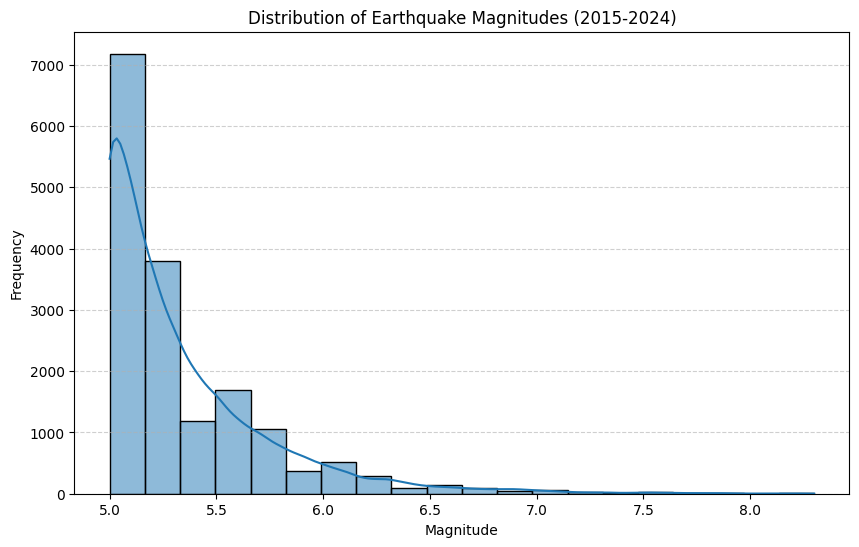

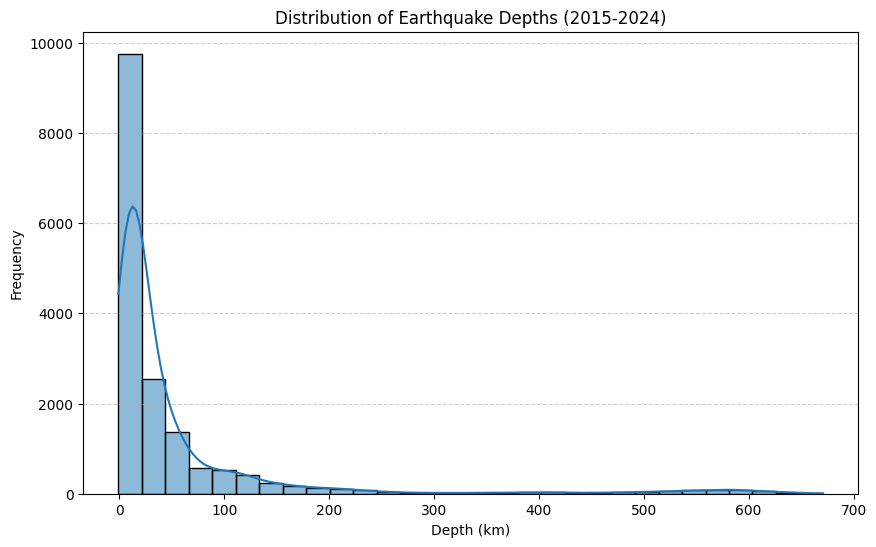

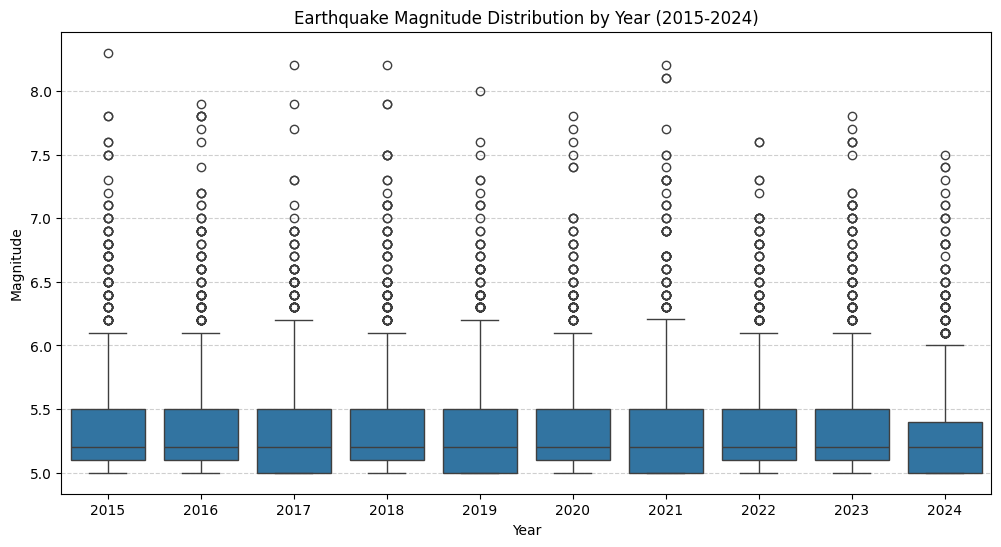

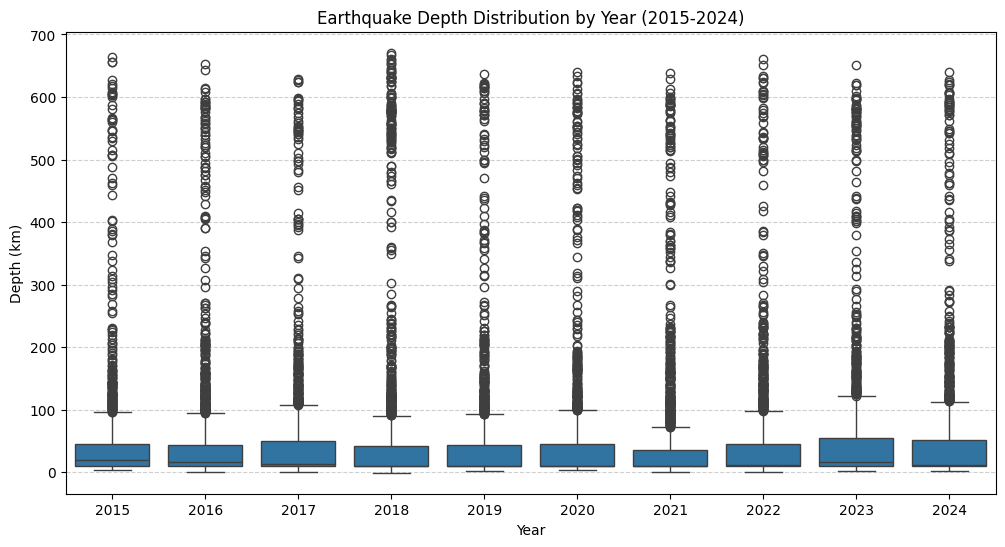

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is already loaded and processed from the previous cells

if df_cleaned is not None:
    # Check if crucial columns exist before proceeding.
    required_cols_dist = ['Magnitude', 'Depth_km', 'Year']
    if not all(col in df_cleaned.columns for col in required_cols_dist):
        print("\nError: The cleaned dataset is missing one or more required columns for distribution plots.")
        print(f"Required columns: {required_cols_dist}")
        print(f"Available columns: {df_cleaned.columns.tolist()}")
    else:
        # --- Move plotting code here, outside the 'if not all(...)' block ---

        # 1. Histogram of Magnitude
        plt.figure(figsize=(10, 6))
        # Drop rows with missing Magnitude for this plot
        sns.histplot(data=df_cleaned.dropna(subset=['Magnitude']), x='Magnitude', bins=20, kde=True)
        plt.title('Distribution of Earthquake Magnitudes (2015-2024)')
        plt.xlabel('Magnitude')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()

        # 2. Histogram of Depth
        plt.figure(figsize=(10, 6))
        # Drop rows with missing Depth_km for this plot
        sns.histplot(data=df_cleaned.dropna(subset=['Depth_km']), x='Depth_km', bins=30, kde=True)
        plt.title('Distribution of Earthquake Depths (2015-2024)')
        plt.xlabel('Depth (km)')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()

        # 3. Box Plot of Magnitude by Year
        plt.figure(figsize=(12, 6))
        # Drop rows with missing Magnitude or Year for this plot
        sns.boxplot(data=df_cleaned.dropna(subset=['Magnitude', 'Year']), x='Year', y='Magnitude')
        plt.title('Earthquake Magnitude Distribution by Year (2015-2024)')
        plt.xlabel('Year')
        plt.ylabel('Magnitude')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()

        # 4. Box Plot of Depth by Year
        plt.figure(figsize=(12, 6))
        # Drop rows with missing Depth_km or Year for this plot
        sns.boxplot(data=df_cleaned.dropna(subset=['Depth_km', 'Year']), x='Year', y='Depth_km')
        plt.title('Earthquake Depth Distribution by Year (2015-2024)')
        plt.xlabel('Year')
        plt.ylabel('Depth (km)')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()
        # --- End of moved plotting code ---

else:
    print("\nCould not generate distribution plots as the cleaned dataset is not available.")


Generating scatter plot of Magnitude vs. Depth.


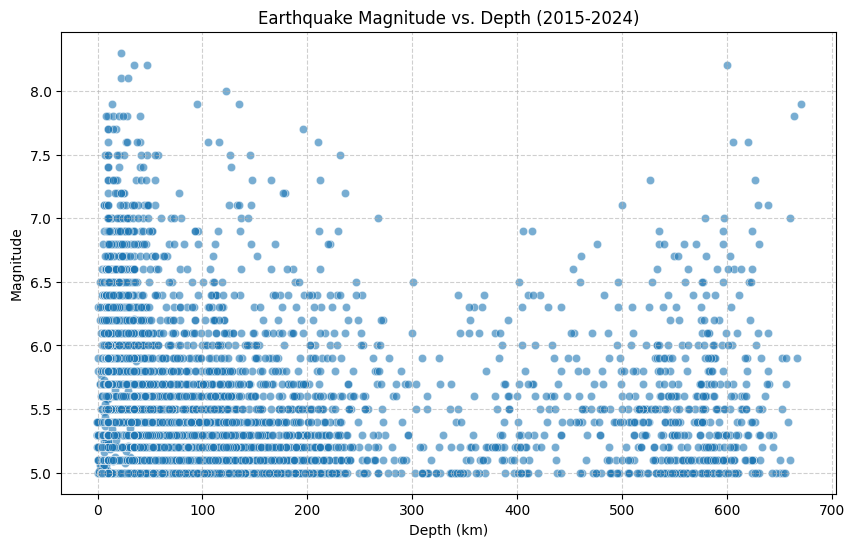

In [30]:
# This cell is for the Scatter Plot, which was already provided earlier.
# Including it here for completeness if you want all graphs together.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is already loaded and processed from the previous cells

if df_cleaned is not None:
    # Check if necessary columns for scatter plot exist
    required_cols_scatter = ['Magnitude', 'Depth_km']
    if not all(col in df_cleaned.columns for col in required_cols_scatter):
        print(f"\nError: The cleaned dataset is missing one or more required columns for the scatter plot: {required_cols_scatter}")
        print(f"Available columns: {df_cleaned.columns.tolist()}")
    else:
        print("\nGenerating scatter plot of Magnitude vs. Depth.")
        # Remove rows with missing values in the required columns for the plot
        df_scatter = df_cleaned.dropna(subset=required_cols_scatter).copy()

        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_scatter, x='Depth_km', y='Magnitude', alpha=0.6)
        plt.title('Earthquake Magnitude vs. Depth (2015-2024)')
        plt.xlabel('Depth (km)')
        plt.ylabel('Magnitude')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
else:
    print("\nCould not generate scatter plot as the cleaned dataset is not available.")